First we import required modules and load the data from the .json file to a Pandas DataFrame. We inspect the DataFrame object to determine its properties. 

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
data = pd.read_json("Assignment_03/reviews.json") # Data import 
data['date'] = data['date'].apply(lambda x: datetime.fromordinal(x)) # Date conversion
data.head(4)

,author,body,date,helpful,stars,style,title
0,Gene H.,We were looking for a decent flashlight for ou...,2018-04-11,0,5,LED Flashlight 2P,Great range for a small package
1,Cwazy Wabbit,"Very nice, works great",2018-04-11,0,5,LED Flashlight 2P,Five Stars
10,David C. Bradford,Sturdy little lights that work every time as a...,2018-04-10,0,5,LED Flashlight 2P,Sturdy little lights that work every time as
100,MDD,I bought 2 and they worked great for 2-3 weeks...,2018-03-09,0,1,LED Flashlight 2P,I bought 2 and they worked great for 2-3 weeks...


The dataframe is of the shape `(833, 7)` and its axes are: `['author', 'body', 'date', 'helpful', 'stars', 'style', 'title']`.
Lets now try to create an incredibly simple bag-of-words classification model for the data. 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
body_list = data['body'].tolist()
rating_list = data['stars'].tolist()
x_train, x_test, y_train, y_test = train_test_split(body_list, rating_list, test_size=0.2, random_state=1)
vectorizer = CountVectorizer(lowercase=True, strip_accents='ascii', stop_words='english', min_df=0.01, max_df=0.9, binary=True)
vectorizer = vectorizer.fit(x_train)
x_train = vectorizer.transform(x_train) #just do .toarray() here?
x_test = vectorizer.transform(x_test)
total_word_counts = [sum(word_count) for word_count in zip(*x_train.toarray())]
word_frequencies = dict(zip(vectorizer.get_feature_names(), total_word_counts))
most_frequent_term = max(word_frequencies, key = word_frequencies.get)
print("The most frequent term is '" + most_frequent_term + "' and it occurs " + str(word_frequencies[most_frequent_term]) + " times in the training corpus.")

The most frequent term is 'bright' and it occurs 218 times in the training corpus.


Now we shall attempt to plot some data points, despite rampant issues with python plotting in Pycharm and within iPython Notebooks.

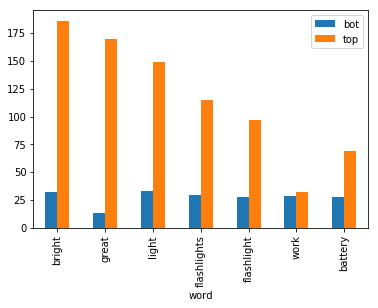

In [9]:
# import plotly.plotly as py
# import cufflinks as cf
# from plotly.graph_objs import *
top_indexes = [i for i, x in enumerate(y_train) if x>=4]
bot_indexes = [i for i, x in enumerate(y_train) if x<4]
top_reviews = x_train.toarray()[top_indexes]
bot_reviews = x_train.toarray()[bot_indexes]
top_word_counts = [sum(word_count) for word_count in zip(*top_reviews)]
bot_word_counts = [sum(word_count) for word_count in zip(*bot_reviews)]
top_bot_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "top": top_word_counts, "bot": bot_word_counts})
import matplotlib.pyplot as plt
a = top_bot_word_counts.sort_values('top', ascending=False)[:5].set_index('word')
b = top_bot_word_counts.sort_values('bot', ascending=False)[:5].set_index('word')
a.append(b).drop_duplicates().plot.bar()
# top_bot_word_counts.sort_values('top', ascending=False)[:5].iplot(kind='bar', filename='cufflinks/grouped-bar-chart') #'jupyter/styled_bar'
# top_bot_word_counts.sort_values('top', ascending=False)[:5].iplot(kind='bar', filename='jupyter/styled_bar') 